In [53]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import geopandas as gp
from shapely.geometry import Point, Polygon

In [86]:
import CustomPipeline as cp
imputedHousingData=cp.clean('./data/Ames_Housing_Price_Data.csv')
sns.set(rc={'figure.figsize':(14,10)})
imputedHousingData['logSalePrice']=np.log(imputedHousingData['SalePrice'])

In [74]:
shapefile = './location_mapping/Ames/Ames Precincts.shp'
df_neighbourhoods=gp.read_file(shapefile)
df_neighbourhoods
mappingData = pd.read_csv('./location_mapping/full_latlon.csv')
parkData = pd.read_csv('./location_mapping/AmesParksCoordinates.csv',header=None)

In [56]:
imputedHousingData_map = pd.merge(imputedHousingData, mappingData, on='PID')

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Alley'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'RoofStyle'}>,
        <AxesSubplot:title={'center':'RoofMatl'}>,
        <AxesSubplot:title={'center':'Exterior1st'}>,
        <AxesSubplot:title={'center':'Exterior2nd'}>,
        <AxesSubplot:title={'center':'MasVnrType'}>,
        <A

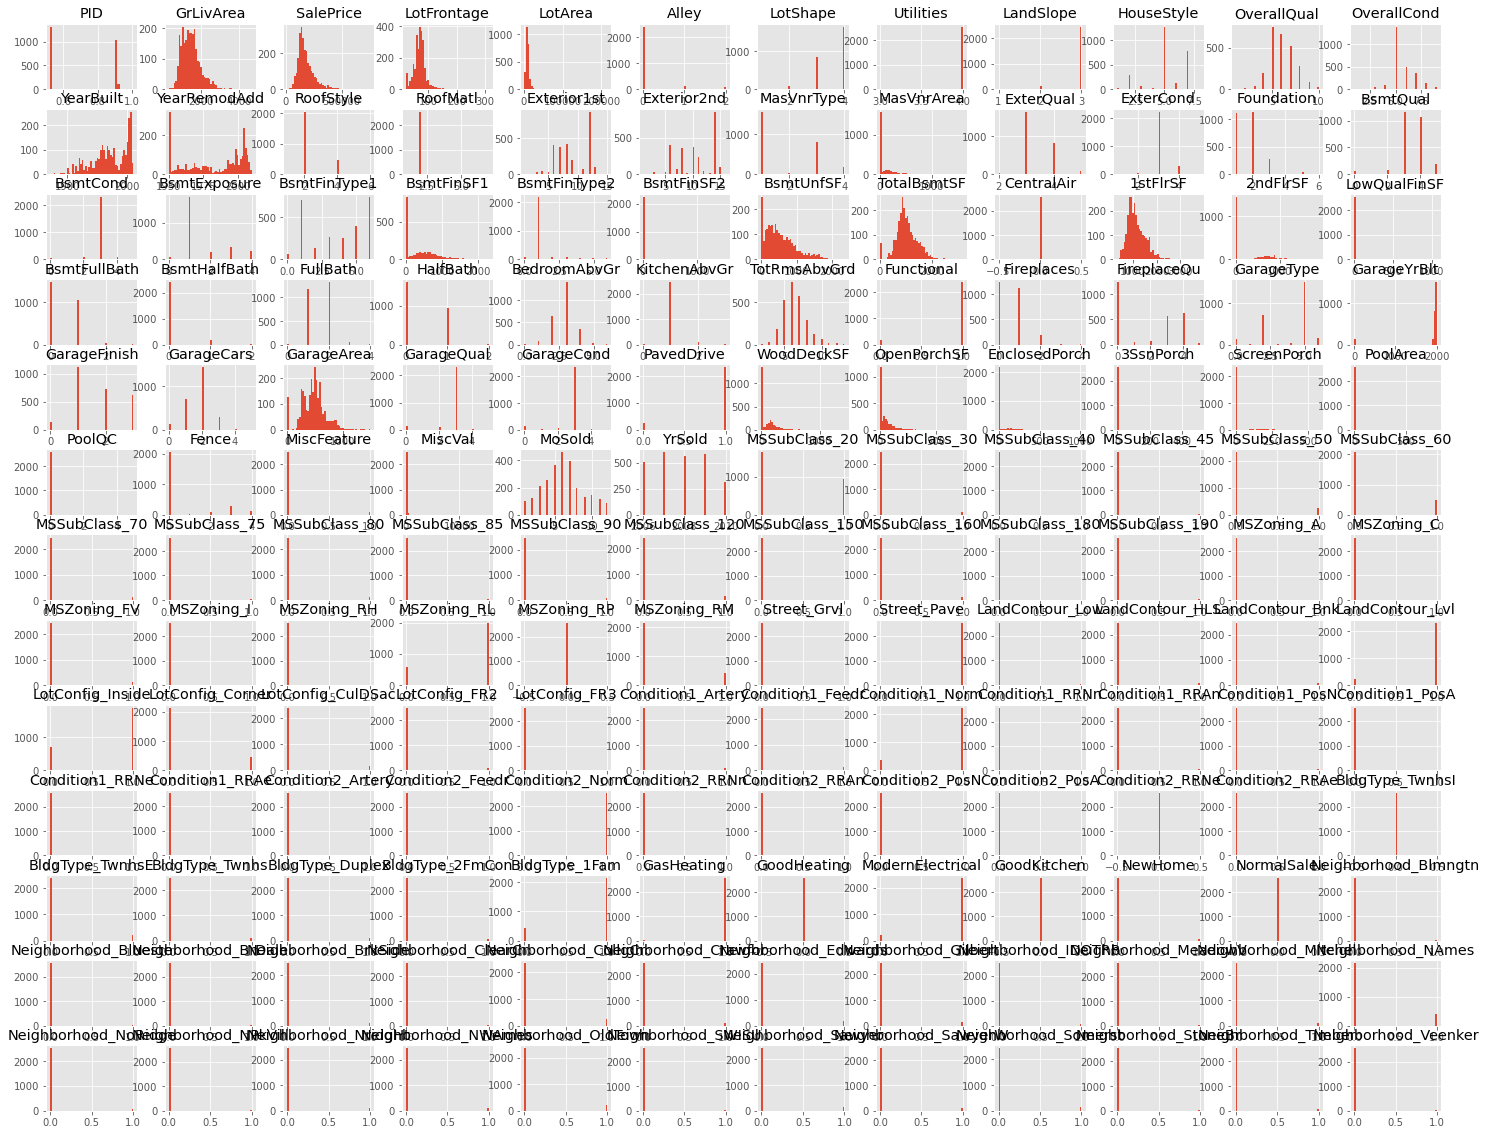

In [8]:
imputedHousingData.hist(bins=50,figsize=(25,20))

In [57]:
def convert_latitude(coordinate):
    return float(str(coordinate).replace("(","").replace(")","").split(",")[0])
def convert_longitude(coordinate):
    if (len(str(coordinate).replace("(","").replace(")","").split(",")))==2:
        return float(str(coordinate).replace("(","").replace(")","").split(",")[1])
    else:
        return 0
imputedHousingData_map["latitude"]=imputedHousingData_map['coord'].apply(convert_latitude)
imputedHousingData_map["longitude"]=imputedHousingData_map['coord'].apply(convert_longitude)

In [61]:
cheapest_100_homes=imputedHousingData_map[imputedHousingData_map.SalePrice<=85000]


In [76]:
parknames=parkData[0].tolist()
parklatitudes=parkData[1].tolist()
parklongitudes=parkData[2].tolist()

<AxesSubplot:>

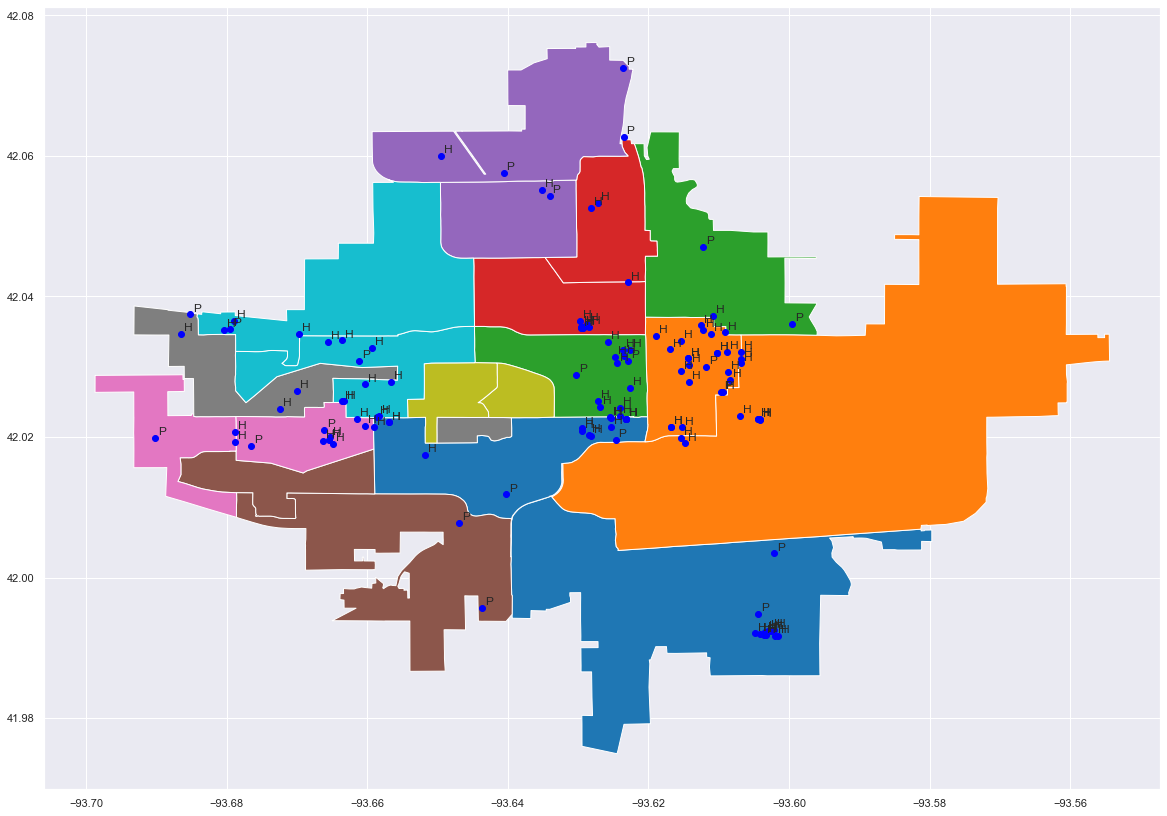

In [83]:
amesPoints = pd.DataFrame({
    'Point':cheapest_100_homes['PID'].tolist()+parknames[0:25],
    'Latitude':cheapest_100_homes['latitude'].tolist()+parklatitudes[0:25],
    'Longitude':cheapest_100_homes['longitude'].tolist()+parklongitudes[0:25]
})
gdf = gp.GeoDataFrame(amesPoints, geometry=gp.points_from_xy(amesPoints.Longitude, amesPoints.Latitude))
ax=df_neighbourhoods.plot(column="NAME", cmap=None,figsize=(20, 20))

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Point):
    if type(label)==str and label.find("Park")>-1:
        ax.annotate("P", xy=(x, y), xytext=(3, 3), textcoords="offset points")
    else:
        ax.annotate("H", xy=(x, y), xytext=(3, 3), textcoords="offset points")
gdf.plot(ax=ax,color="blue")
